# Project 2: Investigate a Data Set
## Tegan Lohman

For this project I examined the Titanic data set. I used python code, notably the pandas, numpy, and matplotlib libraries, to examine the data. 

In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic_data.csv')

titanic



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# What factors made a person most likely to survive the Titanic?
First, I will look at overall survivorship and survivorship by sex, age, and class.

In [2]:
print str(round(titanic['Survived'].mean(), 3) * 100) + "% of the passengers on the Titanic survived"

38.4% of the passengers on the Titanic survived


In [3]:
# group passengers by sex
sex_groups = titanic.groupby('Sex')
print "Fraction of survivorship among men and women"
print sex_groups['Survived'].mean()
print ''
print "Total passengers by sex"
print sex_groups['PassengerId'].count()

    

Fraction of survivorship among men and women
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Total passengers by sex
Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [4]:
# group passengers by class
SES_groups = titanic.groupby('Pclass')
print "Fraction of survivorship by class"
print SES_groups['Survived'].mean()
print ''
print "Total passengers by class"
print SES_groups['PassengerId'].count()

Fraction of survivorship by socioeconomic class
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Total passengers by class
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


Unsurprisingly, women were more likely to survive than men, and first class passengers were more likely to survive than third class passengers.

#### Does surivorship by sex remain constant across all passenger classes?

In [97]:
#group passengers by sex and class
sex_SES_groups = titanic.groupby(['Pclass', 'Sex'])
a = sex_SES_groups['Survived'].sum() 
b = sex_SES_groups['PassengerId'].count()
print "Fraction of survivorship by sex and class"
print a/b

Fraction of survivorship by sex and class
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64


First and second class women were much better off, as were first class men. As percentages go, second and third class men shared a similar fate.

Populating the interactive namespace from numpy and matplotlib


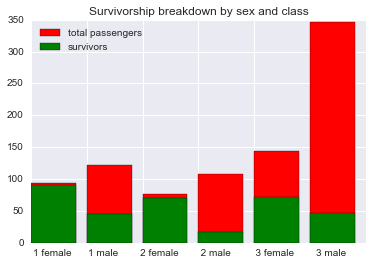

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

groups ="1 female      1 male        2 female        2 male         3 female        3 male"
index = [1,2,3,4,5,6]

% pylab inline

plt.bar(index, b, color = 'red', label = "total passengers" )
plt.bar(index, a, color = 'green', label = "survivors")
plt.figtext(0.13, 0.08, groups)
plt.legend(loc = 2)
plt.tick_params(axis = 'x', which = 'both', bottom = 'off', labelbottom = 'off') 
plt.title("Survivorship breakdown by sex and class")
plt.show()

I chose to present this data as both fractions and a plot, as I feel the two tell a slightly different story. The fractions make it easy to compare across classes, however it didn't give me a good sense of how the men fared, compared to the women, for the different classes. I feel the plot answers this question better.

The plot above shows survivors (green) against total passengers (red), broken down by class and sex. One observation is that first class passengers were significantly more likely to survive than second or third class passsengers, and women were significantly more likely to survive than men. However, across classes, the differences between women and men do not remain constant. Notably, more men traveling third class survived, than men traveling second class. However, this does not indicate they were more likely to survive, as there were many more who did not. But the total quantity of male and female survivors in third class was much more equitable in than in first and second.

#### How did age affect a person's chances of survival?

In [5]:
#create age groups (calling them "bands" for clarity)
titanic['Age'].dtype
titanic['age_band'] = titanic['Age'] / 10
titanic['age_band'] = titanic['age_band'].round(0) * 10

In [6]:
#group by age bands
age_groups = titanic.groupby('age_band')
print "Fraction of survivorship by age group"
print age_groups['Survived'].mean()
print ''
print "Total passengers by age group"
print age_groups['PassengerId'].count()

Fraction of survivorship by age group
age_band
0.0     0.704545
10.0    0.411765
20.0    0.354260
30.0    0.404494
40.0    0.424242
50.0    0.409836
60.0    0.352941
70.0    0.000000
80.0    1.000000
Name: Survived, dtype: float64

Total passengers by age group
age_band
0.0      44
10.0     34
20.0    223
30.0    178
40.0    132
50.0     61
60.0     34
70.0      7
80.0      1
Name: PassengerId, dtype: int64


The fractions above show what fraction of passengers in each age group survived. Note that the age groups are based on rounding, so 0.0 represents children under 5, 10.0 represents ages 5-14, and so on. I also printed the total passengers by age group. Since there were few passengers in the 70 and 80 year groups, their fractions may not represent reliable figures.

In [7]:
#create a new data frame with only survivors
survivors = pd.DataFrame(titanic.query('Survived == 1'))


Populating the interactive namespace from numpy and matplotlib


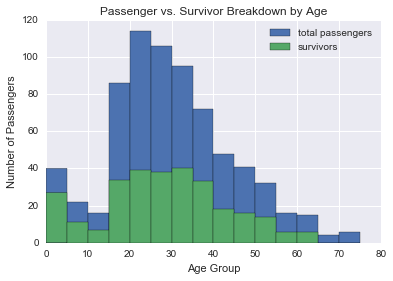

In [88]:
%pylab inline

x = pd.Series(titanic['Age']).dropna()
y = pd.Series(survivors['Age']).dropna()

plt.hist(x, label = "total passengers", bins = range(0, 80, 5))
plt.hist(y, label = "survivors", bins = range(0, 80, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title(r'Passenger vs. Survivor Breakdown by Age')
plt.legend()


The histogram above provides a visual aid for the fractions in the previous section. About 70% of passengers under 5 years old survived, representing much better odds than older passengers. Passengers between 5 and 60 years had a 35-40% chance of survival; the plot about shows those odds as relatively constant for older passengers. It makes sense that young children would have a better chance. They don't take up much space in a lifeboat and tend to garner more compassion than adults. It is interesting that older children - 5-14 years - were not significantly more likely to survive than their older counterparts. Perhaps children too big to be carried got lost in the panicked crowds. 

It would be interesting to examine whether parents of young children were more likely to survive than their childless peers. However, since the data only lists whether a parent or child was on board, I would have to make a lot of assumptions about whether passengers in their teens and twenties were the parents or the children. Additionally, it would be difficult to match up families. For these reasons, I chose not to go any further on this question.

### Are there any correlations between cabin location and survivorship?

In [91]:
#create a new data frame with only known cabins

cabins = titanic[pd.notnull(titanic['Cabin'])]

In [98]:
# group cabins df by deck
def get_deck(cabin):
    cabin = str(cabin)
    return cabin[0]

cabins['Deck'] = cabins['Cabin'].apply(get_deck)


deck_groups = cabins.groupby('Deck')
print "Fraction of survivorship by cabin deck"
print deck_groups['Survived'].mean()
print ''
print "Total passengers by deck"
print deck_groups['PassengerId'].count()


Fraction of survivorship by cabin deck
Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

Total passengers by deck
Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: PassengerId, dtype: int64


C:\Users\Tegan\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Passengers on decks B, D, and E were most likely to survive, however due to the low numbers of passengers on decks A, F, G, and T, this conclusion may not be very meaningful. It is interesting that deck C had the greatest number of passengers, and a lower survivorship rate. I will examine this more in the next section. 
It is also worth noting that most of the cabins listed belonged to first and second-class passengers. So these conclusions are not representative of the ship as a whole.

#### Cabin Layout
For all decks except E even cabins were on the port side of the ship and odd cabins were on the starboard side. On decks A an B (with a very few exceptions), cabins over 100 were located in the center of the ship while cabins below 100 were located on the exterior walls. On decks E and F, no specific numbering indicates inner vs. outer placement. On deck E, all the cabins were on the starboard side. On decks F and G, cabins were concentrated toward the bow and stern of the ship, with no clear numbering system indicating position.
Source: http://www.encyclopedia-titanica.org/titanic-deckplans

In [92]:
#determine whether a cabin was on the port or starboard side of the ship
def cabin_side(cabin):
    cabin = str(cabin)
    cabin = cabin.strip()
    #replace single character cabins with dummy variable
    if len(cabin) < 2:
        cabin = "H1"
    #for cabins prefaced by an unexplained letter, remove that letter (not the deck)
    elif cabin[1] not in ["0","1","2","3","4","5","6","7","8","9"] and len(cabin) > 2:
        cabin = cabin[2:]
    #if multiple cabins are listed, only look at the first one
    cabin = cabin.split()[0]
    #split up the deck and cabin number
    deck = cabin[0]
    num = int(cabin[1:])
    if deck == "E":
        side = "starboard"
    elif deck == "H" or deck == "G":
        side = "unknown"
    else:
        if num % 2 == 0:
            side = "port"
        else:
            side = "starboard"
    return side

#determine whether the cabin was on an exterior wall (outer) or not (inner):
def cabin_position(cabin):
    cabin = str(cabin)
    cabin = cabin.strip()
    #replace single character cabins with dummy variable
    if len(cabin) < 2:
        cabin = "H1"
    #for cabins prefaced by an unexplained letter, remove that letter (not the deck)
    elif cabin[1] not in ["0","1","2","3","4","5","6","7","8","9"] and len(cabin) > 2:
        cabin = cabin[2:]
    #if multiple cabins are listed, only look at the first one
    cabin = cabin.split()[0]
    #split up the deck and cabin number
    deck = cabin[0]
    num = int(cabin[1:])
    if deck == "E":
        if num in [200, 201, 202, 203, range(11, 15), 26, 27, 40, 41, 42, 47, 48, range(57,62)]:
            position = "inner"
        else:
            position = "outer"
    else:
        if deck == "B" or deck == "C":
            if num >= 100:
                position = "inner"
            else:
                position = "outer"
        elif deck == "A":
            position = "outer"
        elif deck == "D":
            if num in [75, 76, 79, 80, range(38,50), range(1,6)]:
                position = "inner"
            else:
                position = "outer"
        elif deck == "H": #dummy variable
            position = "unknown"
        else:
            position = "unknown"
    return position


cabins['Side'] = cabins['Cabin'].apply(cabin_side)
cabins['Position'] = cabins['Cabin'].apply(cabin_position)

C:\Users\Tegan\Anaconda2\lib\site-packages\ipykernel\__main__.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tegan\Anaconda2\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Populating the interactive namespace from numpy and matplotlib
Fraction of survivors by cabin location
Side      Position
port      inner       0.454545
          outer       0.605634
          unknown     0.666667
starbird  inner       0.777778
          outer       0.752688
          unknown     1.000000
unknown   unknown     0.363636
dtype: float64


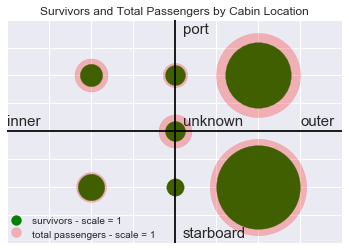

In [23]:
% pylab inline

#group cabins by side and position
side_groups = cabins.groupby(['Side', 'Position'])
a = side_groups['Survived'].sum()
b = side_groups['PassengerId'].count()


print "Fraction of survivors by cabin location"
print a/b

#plotting passengers and surviorship based on cabin location
plt.scatter(x = 1, y = 1, s=a[1]*100, color = 'green') #port, outer
plt.scatter(x = 1, y = 1, s=b[1]*100, color = 'red', alpha = 0.25)
plt.scatter(x = 1, y = -1, s=a[4]*100, color = 'green') #starboard, outer
plt.scatter(x = 1, y = -1, s=b[4]*100, color = 'red', alpha = 0.25)
plt.scatter(x = -1, y = 1, s=a[0]*100, color = 'green') #port, inner
plt.scatter(x = -1, y = 1, s=b[0]*100, color = 'red', alpha = 0.25)
plt.scatter(x = -1, y = -1, s=a[3]*100, color = 'green') #starboard, inner
plt.scatter(x = -1, y = -1, s=b[3]*100, color = 'red', alpha = 0.25)
plt.scatter(x = 0, y = 1, s=a[2]*100, color = 'green') #port, unknown
plt.scatter(x = 0, y = 1, s=b[2]*100, color = 'red', alpha = 0.25)
plt.scatter(x = 0, y = -1, s=a[5]*100, color = 'green') #starboard, unknown
plt.scatter(x = 0, y = -1, s=b[5]*100, color = 'red', alpha = 0.25)
plt.scatter(x = 0, y = 0, s=a[6]*100, color = 'green') #unknown, unknown
plt.scatter(x = 0, y = 0, s=b[6]*100, color = 'red', alpha = 0.25)
plt.scatter(x = -1.9, y = -1.6, s=1*100, color = 'green') #legend
plt.scatter(x = -1.9, y = -1.8, s=1*100, color = 'red', alpha = 0.25)
plt.text(-2, 0.1, 'inner', size = 15)
plt.text(1.5, 0.1, 'outer', size = 15)
plt.text(0.1, 1.75, 'port', size = 15)
plt.text(0.1, -1.9, 'starboard', size = 15)
plt.text(0.1, 0.1, 'unknown', size = 15)
plt.text(-1.7, -1.9, "total passengers - scale = 1")
plt.text(-1.7, -1.65, "survivors - scale = 1")
plt.tick_params(axis = 'both', which = 'both', bottom = 'off', left = 'off', labelleft = 'off',labelbottom = 'off') 
plt.axhline(color = 'black')
plt.axvline(color = 'black')
xlim(-2,2)
ylim(-2,2)
plt.legend(loc = (1,1), size = 10)
plt.title('Survivors and Total Passengers by Cabin Location')



plt.show()


An ideal way to plot the cabin data would be to color in the cabin locations on the actual ship plans: green for survivors, red for victims. However, while I had access to the ship plans, they do not posess a common coordinate system, so the only way to create such a visualization would be by hand; an impractical method for over 200 data points. As an alterative, I used a cartesian system and labeled my axes to represent different parts of the ship. The size of the points represents the number of passengers. The legend indicates the area represented by a single passenger for scale.

The Titanic hit the iceberg that sank it at 11:40 PM, so it is likely that many passengers were in their cabins at the time of the collision. The visualization above indicates that passengers housed on the starboard side of the ship were more likely to survive than those housed on the port side. This is surprising; the iceberg struck the starboard side of the ship. The difference in survivorship may not be representative, since cabin numbers were only provided for 204 of the 891 passengers in the data set. It also may be due to differences in procedure on the two sides of the ship:
"Many lifeboats only carried half of their maximum capacity ...Few men were allowed into the lifeboats on the port side, while the starboard side only allowed many men into boats after women and children barded." (Wikipedia: Lifeboats of the RMS Titanic)


Sources: http://www.history.com/this-day-in-history/rms-titanic-hits-iceberg
https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic


## Conclusions

In this analysis I examined different factors that might have influenced a person's chances of surviving the Titanic. I looked specifically at sex, class, age, and where a passenger's cabin was located.

The data set includes 891 of the 1,317 total passengers on the titanic. In addition, ship workers are not included in the data.

38.4% of the passengers included in the data set survived. The factors I examined are listed below.

##### Passengers were most likely to survive if...
Female - 74.2%
Rich:
First class - 63.0%
Second class - 47.2%
Young (0-4 years) - 70.5%

##### Passengers were least likely to surivive if...
Male - 18.9%
Third class - 24.2%

##### Factors that may need further exploration
Age - There were some differences (in the 5% range) in survivorship for passengers 5 years old and up. While these differences may be statistically significant, I did not see an obvious trend.
Cabin location - Since most of the cabin locations listed were for first and second class passengers, it is not surprising that all cabin locations showed chances well above the overall ship average. It would be interesting to run this analysis based on a complete data set.

### Limitations of analysis
##### Missing Values
I had to address missing values in my analysis of passenger age and cabin location. For passenger age, I dropped the data points that did not inlcude an age. For cabin location, only about a quarter of the data points included this variable, so I only analyzed the data available. Within this set, there were a few other issues. Some passengers had more than one cabin listed. In these cases, I considered the first cabin listed. This seemed a reasonable assumption since, for the cases I looked at, the cabins were adjacent anyway. Some of the cabin numbers also did not match the pattern of the majority, and the way they were shown on the Titanic deck plans I viewed. For these, if possible, I removed the extraneous characters and just considered the characters that represented a known cabin location. If that was not available (for example, a single letter given), I identified the cabin location as "unknown."
##### Survival Odds Calculations
For this analysis, I used the ratio of survivors to total passengers, expressed as a fraction, to calculate the survival odds for each group. This does not take into account the validity of each sample size. A next step in a further analysis could be to apply statistics to assess how reliable the survival odds I calculated are, and whether they could be used to describe a complete data set.
##### Variables Not Explored
In this analysis, I did not look at ticket price, as that seemed a very similar variable to class. However, it would be interesting to see if passengers who paid more were more likely to survive than passengers who paid less, within the same class. I also did not explore port of departure. There could have been a connection between when people got on the ship and what cabin they were assigned, possibly correlating to survival rate. Finally, I did not explore family relationships, due to the vagueness of the "SibSp" and "ParCh" desginators, and the assumptions required to match families up. However, it could be that enough of this data is clear enough to draw some interesting conclusions.
##### Variables Not Included in the Data Set
Given the opportunity, I would be curious to explore how a person's race, ethnicity, or primary language influenced their chances of survivial. I would also like to see a data set for the ship's crew.



#### Sources Referenced:

Titanic Passenger List and Biographies
www.encyclopedia-titanica.org
python - Bin size in Matplotlib (Histogram) - Stack Overflow
stackoverflow.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20set%20binwidth
www.google.com
Plotting commands summary — Matplotlib 1.5.1 documentation
matplotlib.org
pyplot — Matplotlib 1.5.1 documentation
matplotlib.org
Text introduction — Matplotlib 1.5.1 documentation
matplotlib.org
pyplot — Matplotlib 1.5.1 documentation
matplotlib.org
pyplot — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20commands
www.google.com
Creating a Grouped Bar Chart in Matplotlib
emptypipes.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20bar%20chart%20groups
www.google.com
matplotlib Bar Charts | Examples | Plotly
plot.ly
python - How to access pandas groupby dataframe by key - Stack Overflow
stackoverflow.com
Python Pandas GroupBy get list of groups - Stack Overflow
stackoverflow.com
pylab_examples example code: barchart_demo.py — Matplotlib 1.5.1 documentation
matplotlib.org
how to plot a bar graph of groups matplotlib - Google Search
www.google.com
Lifeboats of the RMS Titanic - Wikipedia, the free encyclopedia
en.wikipedia.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=how%20many%20lifeboats%20did%20the%20titanic%20have
www.google.com
Encyclopedia Titanica: Titanic Facts, History and Biography
www.encyclopedia-titanica.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=titanic
www.google.com
RMS Titanic hits iceberg - Apr 14, 1912 - HISTORY.com
www.history.com
Sinking of the RMS Titanic - Wikipedia, the free encyclopedia
en.wikipedia.org
https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic#Collision
en.wikipedia.org
Titanic Iceberg - Titanic Facts
www.titanicfacts.net
TITANIC REVIEW | The latest Titanic books, films, documentaries reviewed by the experts.
www.encyclopedia-titanica.org
Titanic Deckplans : Profile
www.encyclopedia-titanica.org
pyplot — Matplotlib 1.5.1 documentation
matplotlib.org
Legend guide — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib+legend
Plotting commands summary — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=add%20a%20line%20to%20matplotlib%20scatter%20plot
www.google.com
matplotlib Line and Scatter Plots | Examples | Plotly
plot.ly
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=plot%20a%20line%20on%20plt.scatter
www.google.com
lines_bars_and_markers example code: line_demo_dash_control.py — Matplotlib 1.5.1 documentation
matplotlib.org
http://matplotlib.org/gallery.html#lines_bars_and_markers
matplotlib.org
lines_bars_and_markers example code: line_styles_reference.py — Matplotlib 1.5.1 documentation
matplotlib.org
Thumbnail gallery — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20plot%20types
www.google.com
matplotlib - How to create Major and Minor gridlines with different Linestyles in Python - Stack Overflow
stackoverflow.com
matplotlib major grid lines - Google Search
www.google.com
How to add gridlines in Matplotlib – Code Yarns
codeyarns.com
pylab_examples example code: axes_props.py — Matplotlib 1.5.1 documentation
matplotlib.org
axes_grid example code: demo_curvelinear_grid.py — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20gridspec
www.google.com
python - Remove xticks in a matplot lib plot? - Stack Overflow
stackoverflow.com
python - Hiding axis text in matplotlib plots - Stack Overflow
stackoverflow.com
Pyplot tutorial — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=plt.xlabel
www.google.com
shapes_and_collections example code: scatter_demo.py — Matplotlib 1.5.1 documentation
matplotlib.org
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20scatter
www.google.com
How to make beautiful data visualizations in Python with matplotlib | Dr. Randal S. Olson
www.randalolson.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=matplotlib%20fill%20over%20graphic
www.google.com
python pandas: access the element of the list in DataFrame - Stack Overflow
stackoverflow.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python%20reference%20list%20element%20in%20pandas%20dataframe
www.google.com pandas create new column based on values from other columns - Stack Overflow
stackoverflow.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=add%20column%20to%20pandas%20dataframe%20using%20funciton%20output
www.google.com
Indexing and Selecting Data — pandas 0.18.0 documentation
pandas.pydata.org
python - How to deal with this Pandas warning? - Stack Overflow
stackoverflow.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=A+value+is+trying+to+be+set+on+a+copy+of+a+slice+from+a+DataFrame.
www.google.com
python - Adding calculated column(s) to a dataframe in pandas - Stack Overflow
stackoverflow.com
Data type objects (dtype) — NumPy v1.9 Manual
docs.scipy.org
WorkshopTTU/03-checking_your_data.md at master · wrightaprilm/WorkshopTTU · GitHub
github.com
Python Variable Types
www.tutorialspoint.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=pandas%20dataframe%20get%20data%20type
www.google.com
python - How to delete rows from a pandas DataFrame based on a conditional expression - Stack Overflow
stackoverflow.com
conditionally drop a row of a data frame pandas - Google Search
www.google.com
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=conditionally%20drop%20a%20row%20of%20a%20data%20frame
www.google.com
indexoutofboundsexception - IndexError: list index out of range and python - Stack Overflow
stackoverflow.com
IndexError: list index out of range - Google Search
www.google.com
3. An Informal Introduction to Python — Python 2.7.11 documentation
docs.python.org
python - How to get char from string by index? - Stack Overflow
stackoverflow.com
python string indexing - Google Search
www.google.com
Python String index() Method
www.tutorialspoint.com
Cutting and slicing strings in Python - Python Central
pythoncentral.io
TypeError: not all arguments converted during string formatting error python - Stack Overflow
stackoverflow.com
TypeError: not all arguments converted during string formatting - Google Search
www.google.com
TypeError: not all arguments converted during string formatting python - Stack Overflow
stackoverflow.com


